# Data Screening
**Customer Data Analysis**
A data exploration project to understand customer characteristics and behavior.

## Introduction
This notebook will guide you through the standard steps of data analysis, starting from data loading, cleaning, initial exploration, to visualization

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import cprint

sns.set_style("whitegrid")

#### Data Loading and Overview:
Load the customer dataset and see the first overview.

In [ ]:
data = pd.read_csv('data/data_nasabah.csv', delimiter=';') # Load the dataset

# Overview
print("Dimensi data (Baris, Kolom)")
print(data.shape) # Display the shape of the DataFrame (rows, columns)

cprint("\nInformation data types and encoding", "blue")  # Display data types and encoding scheme
print(data.info())

print("5 Baris pertama dari DataFrame:")
print(data.head())  # Display the first few rows of the DataFrame



#### Validation of Data Quality:
Ensure there are consistency, missing values and data duplication.

In [ ]:
# 1. Check data for consistency
# - Check whether the values in a given column conform to the expected limits.
# - Example: Check if the 'umur' column contains only positive values.
if data['umur'].min() < 0:
    cprint('Kolom "umur" mengandung nilai negatif. Periksa data untuk konsistensi.', "red")
else:
    cprint('Kolom umur valid, tidak ada nilai negatif.', 'green')

# 2. Analysis missing values
cprint("\nAnalisis Nilai yang Hilang:", "blue")
missing_values = data.isnull().sum()
print("Jumlah nilai yang hilang untuk setiap kolom:")
print(missing_values)

# 3. Detect and handle duplicate data
# - Check for duplicate data rows and delete them if necessary.
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    cprint(f"Terdapat {duplicate_rows} baris duplikat. Menghapus duplikat...", "yellow")
    data.drop_duplicates(inplace=True) # Remove duplicate rows
else:
    cprint("Tidak ada baris duplikat.", "green")

# 3. Data range validation
# - Check whether the values in a particular column are within a reasonable range.
# - Example: Check if the 'saldo_rata_rata' column has realistic values.
print("\nValidasi Rentang Saldo Rata-Rata:")
if data['saldo_rata_rata'].max() > 1972000: # Assuming 1972000 is a reasonable upper limit
    cprint('Kolom "saldo_rata_rata" mengandung nilai yang tidak realistis. Periksa data.', "red")
else:
    cprint("Nilai saldo rata-rata dalam rentang yang wajar.", "green")


#### Exploratory Data Analysis (EDA) - Univariate Analysis:
Understand the distribution of each **variable individually**.
- **IMPORTANT:** Categorical visualization is performed BEFORE encoding so that the original labels are visible.

In [ ]:
# Display basic statistics and unique values for each column
cprint("Statistik Deskriptif untuk Data Numerik:", "blue")
print(data.describe()) # Display descriptive statistics for numerical columns

# Unique values for each column
cprint("\nJumlah Nilai Unik untuk Setiap Kolom:", "blue")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")


In [ ]:
# Visualization of Numeric Data Distribution (Histogram & Boxplot)
cprint('\nAnalisis Distribusi Data Numerik:', 'blue')
numerical_features = data.select_dtypes(include=['int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True) # Histogram with Kernel Density Estimate
    plt.title(f"Distribusi {feature}")
    plt.show()

# Analysis outliers
cprint('\nAnalisis Outlier:', 'blue')
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature]) # Boxplot to visualize outliers
    plt.title(f"Deteksi Outlier pada {feature}")
    plt.show()


Visualisasi Distribusi Data Kategorikal (sebelum encoding):


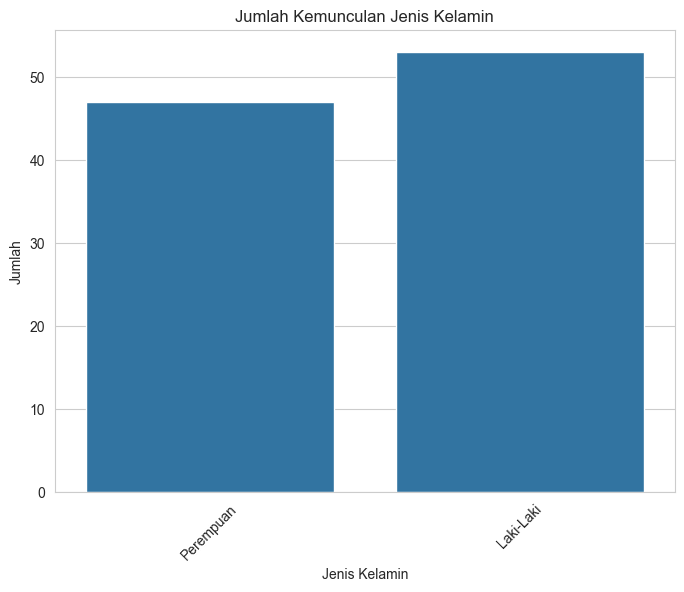

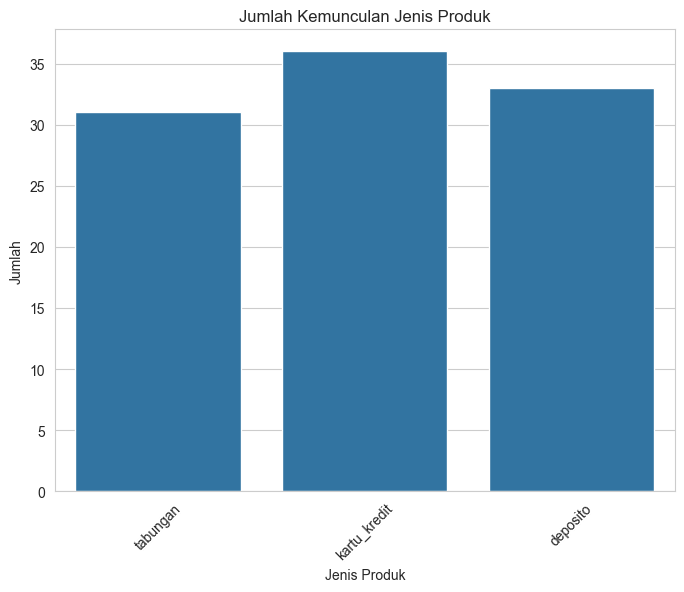

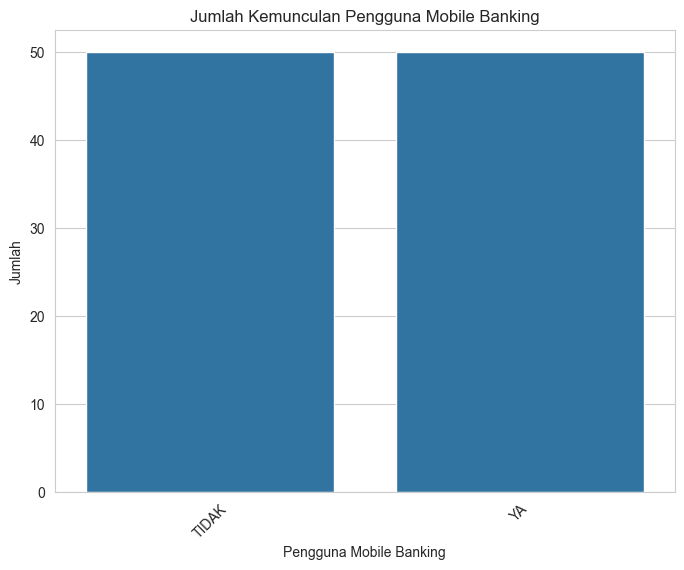

In [77]:
# Visualization of Categorical Data Distribution (Countplot) - BEFORE ENCODING
# Menggunakan kolom asli untuk visualisasi agar label lebih mudah dipahami.
# Kita ambil kolom kategori yang belum di-encode (yaitu yang masih 'object' type)

categorical_features_for_plot = ['jenis_kelamin', 'jenis_produk', 'pengguna_mobile_banking']

print("\nVisualisasi Distribusi Data Kategorikal (sebelum encoding):")
for feature in categorical_features_for_plot:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Jumlah Kemunculan {feature.replace('_', ' ').title()}")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    # plt.savefig(f'images/countplot_{feature}.png')  # Save the plot as an image
    plt.show()


**Data Exploration:**


Analisis Korelasi Antara Variabel Numerik:


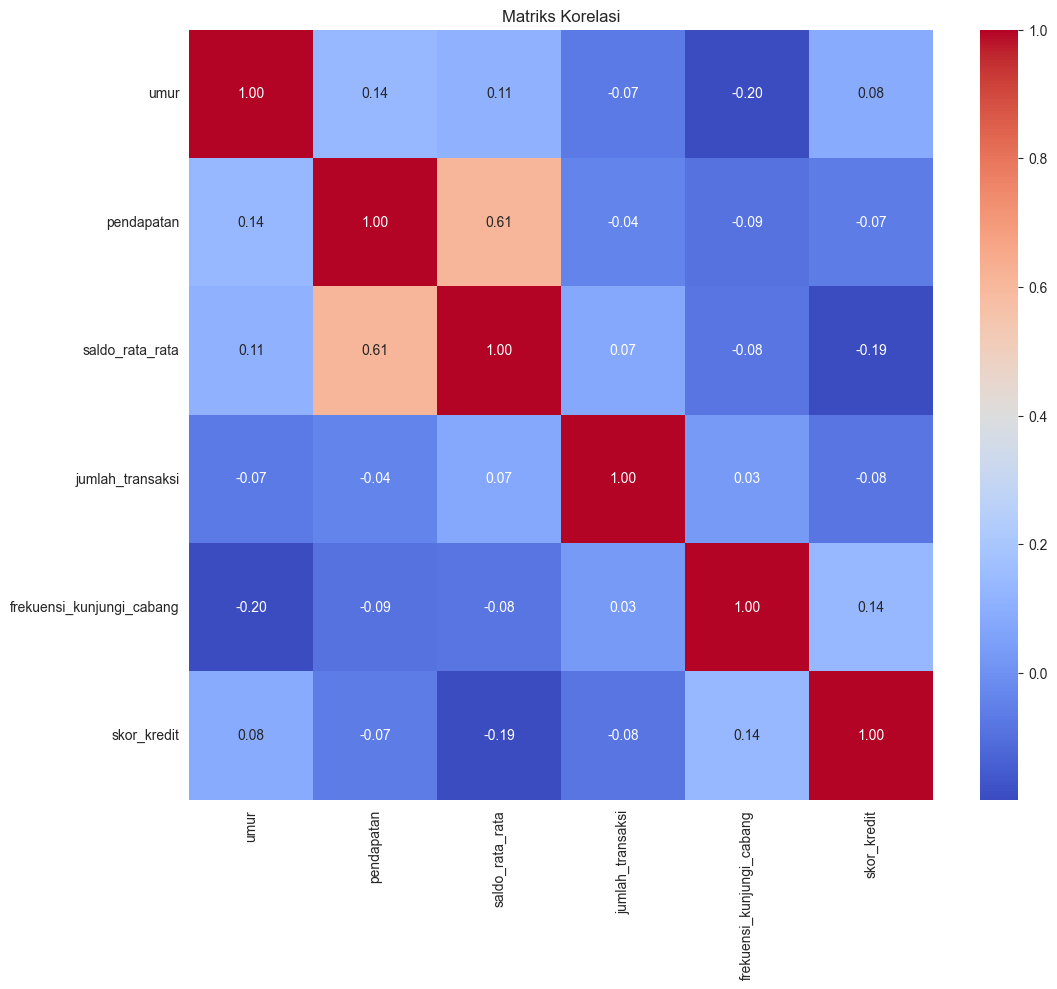


Analisis Korelasi Correlation Matrix: 
                               umur  pendapatan  saldo_rata_rata  \
umur                       1.000000    0.135827         0.110737   
pendapatan                 0.135827    1.000000         0.608964   
saldo_rata_rata            0.110737    0.608964         1.000000   
jumlah_transaksi          -0.070723   -0.038148         0.074638   
frekuensi_kunjungi_cabang -0.197003   -0.093656        -0.083666   
skor_kredit                0.084887   -0.065498        -0.194594   

                           jumlah_transaksi  frekuensi_kunjungi_cabang  \
umur                              -0.070723                  -0.197003   
pendapatan                        -0.038148                  -0.093656   
saldo_rata_rata                    0.074638                  -0.083666   
jumlah_transaksi                   1.000000                   0.030582   
frekuensi_kunjungi_cabang          0.030582                   1.000000   
skor_kredit                       -0.08

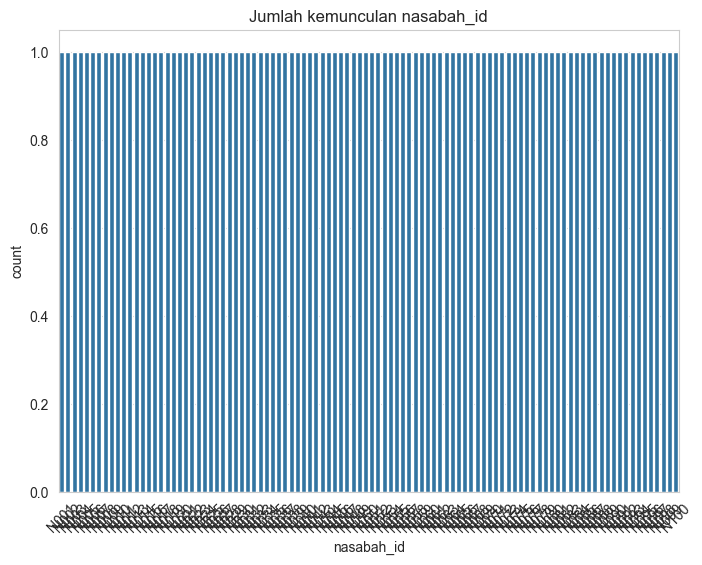

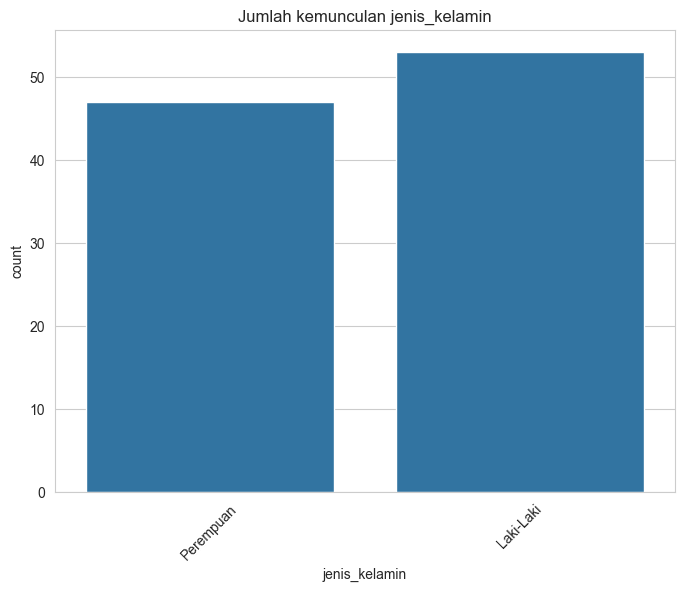

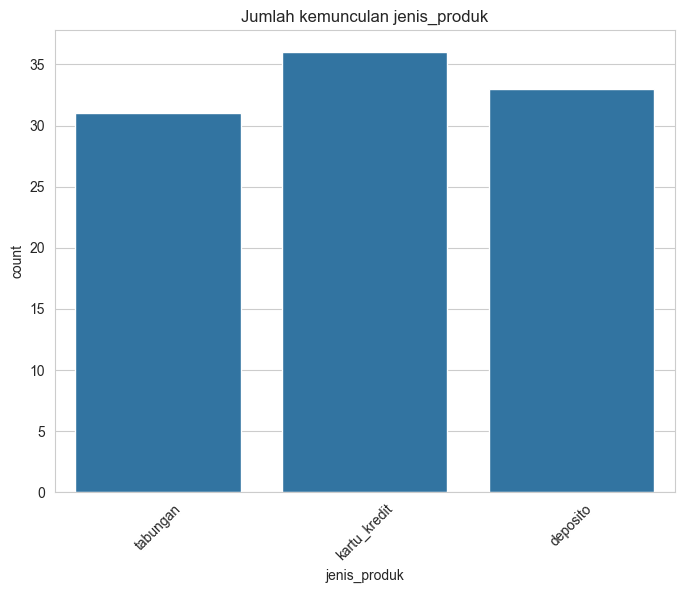

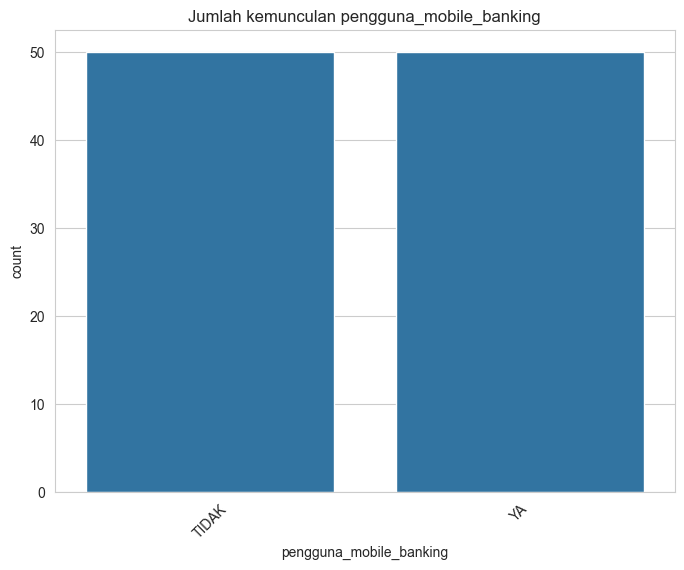


Distribusi Umur:


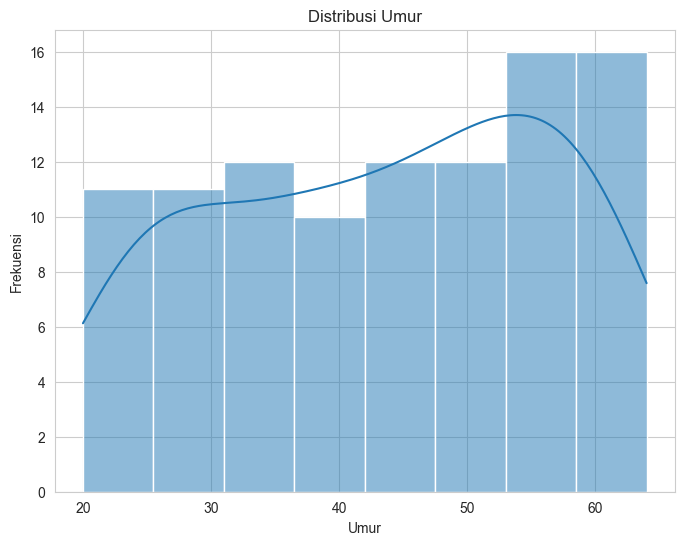


Analisis Hubungan antara Umur dan Pendapatan:


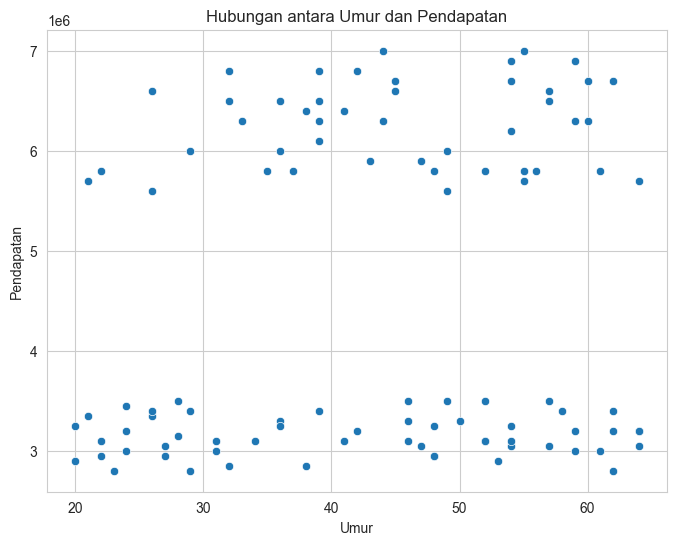


Distribusi Jenis Kelamin:


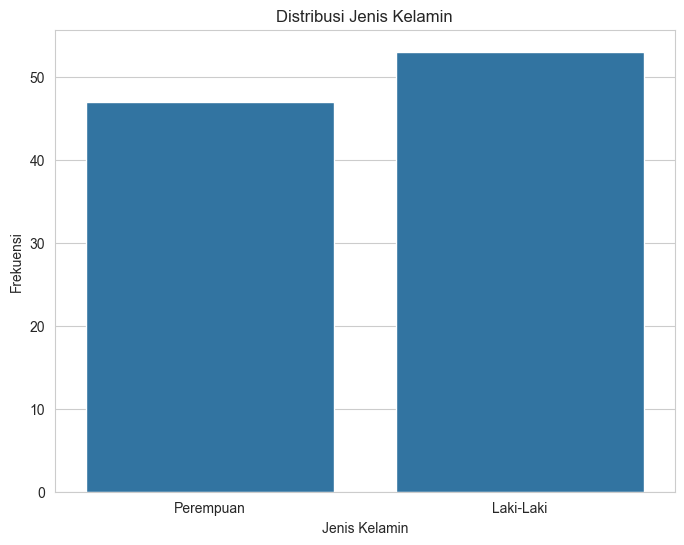


Hubungan antara Jenis Kelamin dan Pendapatan:


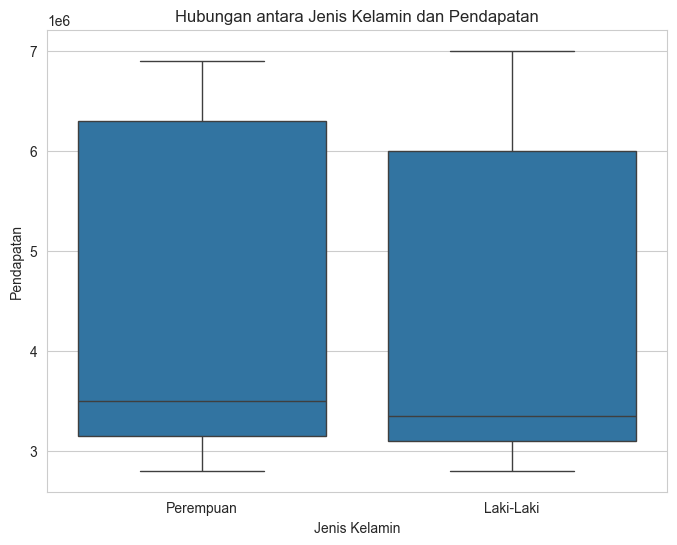

In [75]:

# Analysis Correlation Between Numerical Variables
cprint('\nAnalisis Korelasi Antara Variabel Numerik:', 'blue')
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

cprint('\nAnalisis Korelasi Correlation Matrix: ', 'blue')
print(correlation_matrix)

# Analysis data categorical
cprint('\nAnalisis Data Kategorikal:', 'blue')
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Jumlah kemunculan {feature}")
    plt.xticks(rotation=45)
    plt.show()


# Display distribution for specific columns e.g. 'umur'
cprint('\nDistribusi Umur:', 'blue')
plt.figure(figsize=(8, 6))
sns.histplot(data['umur'], kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Analysis of the relationship between e.g. 'umur' and 'pendapatan'
cprint('\nAnalisis Hubungan antara Umur dan Pendapatan:', 'blue')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='umur', y='pendapatan', data=data)
plt.title('Hubungan antara Umur dan Pendapatan')
plt.xlabel('Umur')
plt.ylabel('Pendapatan')
plt.show()

# Display distribution for column 'Jenis Kelamin'
cprint('\nDistribusi Jenis Kelamin:', 'blue')
plt.figure(figsize=(8, 6))
sns.countplot(x='jenis_kelamin', data=data)
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Frekuensi')
plt.show()

# Display relationship between 'jenis_kelamin' and 'pendapatan'
cprint('\nHubungan antara Jenis Kelamin dan Pendapatan:', 'blue')
plt.figure(figsize=(8, 6))
sns.boxplot(x='jenis_kelamin', y='pendapatan', data=data)
plt.title('Hubungan antara Jenis Kelamin dan Pendapatan')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Pendapatan')
plt.show()


**:**

In [ ]:
# 1. Check data for consistency
# - Check whether the values in a given column conform to the expected limits.
# - Example: Check if the 'umur' column contains only positive values.
if data['umur'].min() < 0:
    cprint('Kolom "umur" mengandung nilai negatif. Periksa data untuk konsistensi.', 'red')
else:
    cprint('Kolom umur valid, tidak ada nilai negatif.', 'green')

# 2. Detect and handle duplicate data
# - Check for duplicate data rows and delete them if necessary.
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    cprint(f'Terdapat {duplicate_rows} baris duplikat. Menghapus duplikat...', 'yellow')
    data.drop_duplicates(inplace=True) # Remove duplicate rows
else:
    cprint('Tidak ada baris duplikat.', 'green')

# 3. Data range validation
# - Check whether the values in a particular column are within a reasonable range.
# - Example: Check if the 'saldo_rata_rata' column has realistic values.
print('\nValidasi Rentang Saldo Rata-Rata:')
if data['saldo_rata_rata'].max() > 1972000: # Assuming 1972000 is a reasonable upper limit
    cprint('Kolom "saldo_rata_rata" mengandung nilai yang tidak realistis. Periksa data.', 'red')
else:
    cprint('Nilai saldo rata-rata dalam rentang yang wajar.', 'green')
